AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [3]:
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Basic operations on the dataset
first_10_rows = titanic_df.head(10)
last_20_rows = titanic_df.tail(20)
dataset_info = titanic_df.info()
dataset_description = titanic_df.describe()

# Prepare to display information as requested
display_items = {
    "First 10 Rows": first_10_rows,
    "Last 20 Rows": last_20_rows,
    "Dataset Description": dataset_description
}
display_items


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


{'First 10 Rows':    PassengerId Survived  Pclass  \
 0            1        0       3   
 1            2        1       1   
 2            3        1       3   
 3            4        1       1   
 4            5        0       3   
 5            6        0       3   
 6            7        0       1   
 7            8        0       3   
 8            9        1       3   
 9           10        1       2   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 5                                   Moran, Mr. James    male   NaN      0   
 6                            McCarthy,

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


DataFrame column names:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


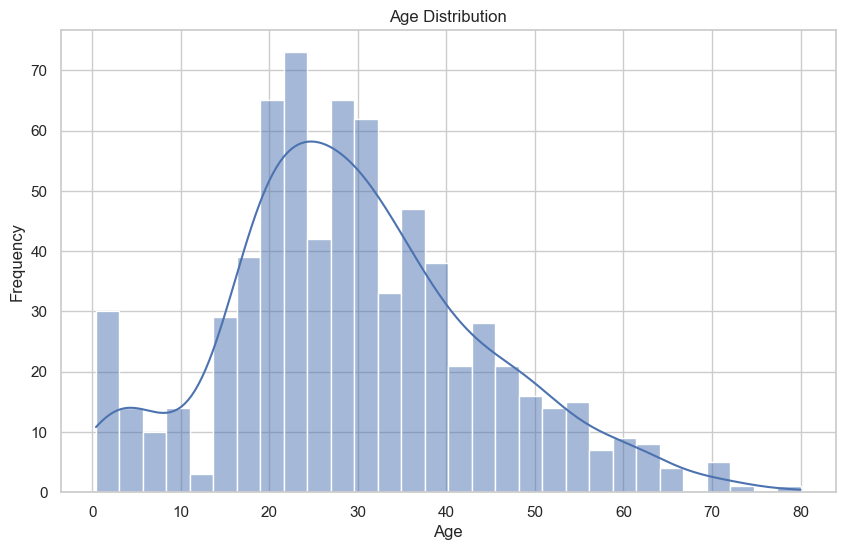

Median Age: 28.0

'Cabin' column does not exist, skipping.

Cleaned DataFrame:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# For demonstration, using the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Print column names for verification
print("DataFrame column names:\n", df.columns)

# 1. Find out how many missing values there are in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

# 2. Handle missing values in the 'Age' column
# 2.1. Plot the distribution of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2. Calculate the central tendency for 'Age'
age_median = df['age'].median()
print(f'Median Age: {age_median}')

# 2.3. Fill missing values in the 'Age' column with the median
df['age'].fillna(age_median, inplace=True)

# 3. Handle missing values in the 'Cabin' column
if 'cabin' in df.columns:
    df['cabin'].fillna('Unknown', inplace=True)
else:
    print("\n'Cabin' column does not exist, skipping.")

# 4. Handle missing values in the 'Embarked' column
if 'embarked' in df.columns:
    embarked_mode = df['embarked'].mode()[0]
    df['embarked'].fillna(embarked_mode, inplace=True)
else:
    print("\n'Embarked' column does not exist, skipping.")

# 5. Handle incorrect data in the 'Survived' column
if 'survived' in df.columns:
    df = df[df['survived'].isin([0, 1])]
else:
    print("\n'Survived' column does not exist, skipping.")

# 6. Handle incorrectly formatted data in the 'Fare' column
if 'fare' in df.columns:
    df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
    fare_median = df['fare'].median()
    df['fare'].fillna(fare_median, inplace=True)
else:
    print("\n'Fare' column does not exist, skipping.")

# Print the cleaned dataset
print("\nCleaned DataFrame:\n", df.head())



AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot


Average fare by Pclass:
    pclass       fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


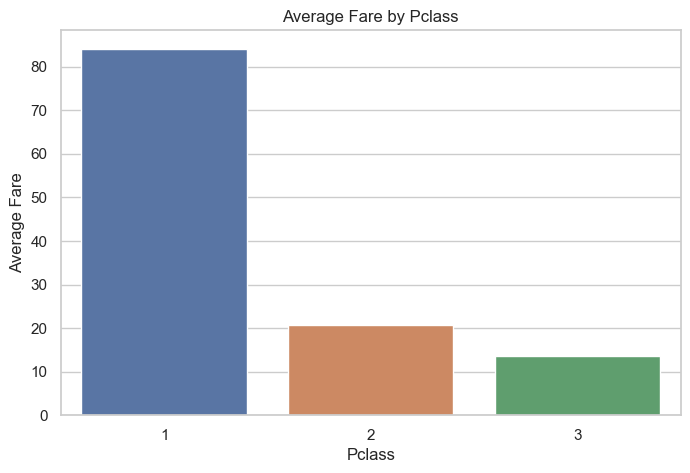


Average fare by Sex:
       sex       fare
0  female  44.479818
1    male  25.523893


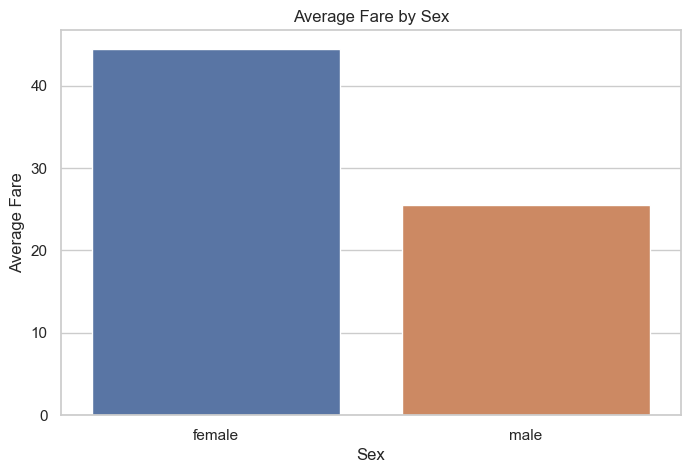

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# For demonstration, using the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# 1. Find out the average fare grouped by Pclass
average_fare_pclass = df.groupby('pclass')['fare'].mean().reset_index()
print("\nAverage fare by Pclass:\n", average_fare_pclass)

# 1.1. Plot the average fare grouped by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='fare', data=average_fare_pclass)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

# 2. Find out the average fare grouped by Sex
average_fare_sex = df.groupby('sex')['fare'].mean().reset_index()
print("\nAverage fare by Sex:\n", average_fare_sex)

# 2.1. Plot the average fare grouped by Sex
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='fare', data=average_fare_sex)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()



AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

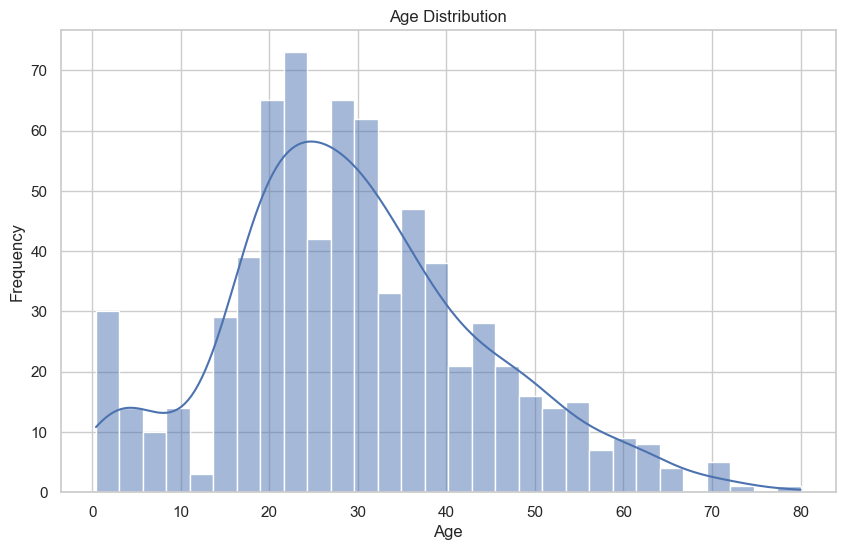

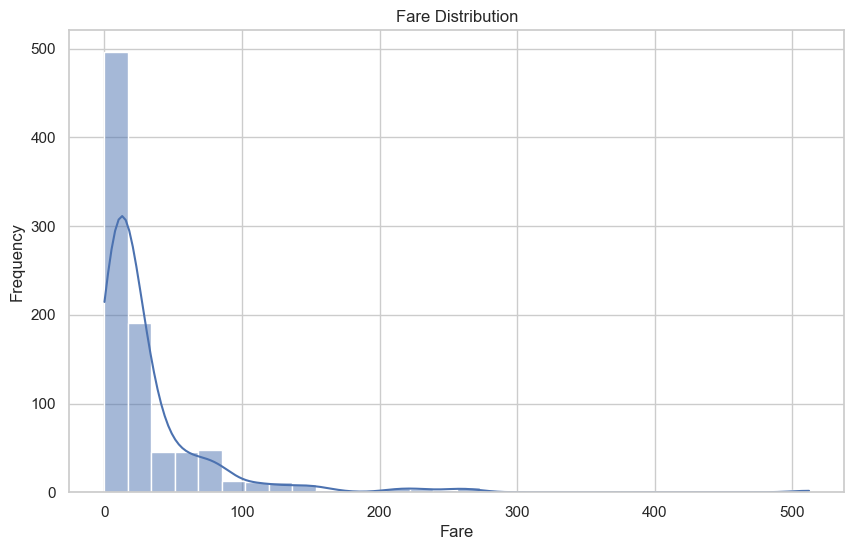

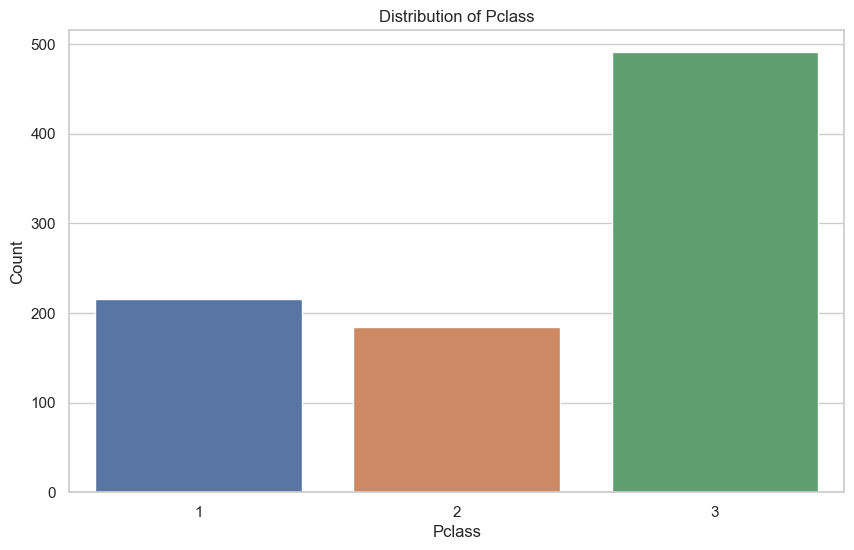

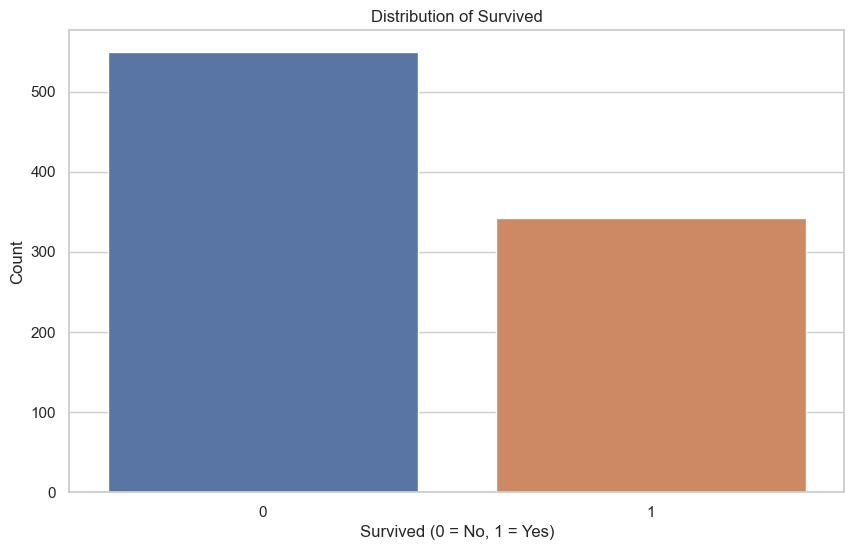

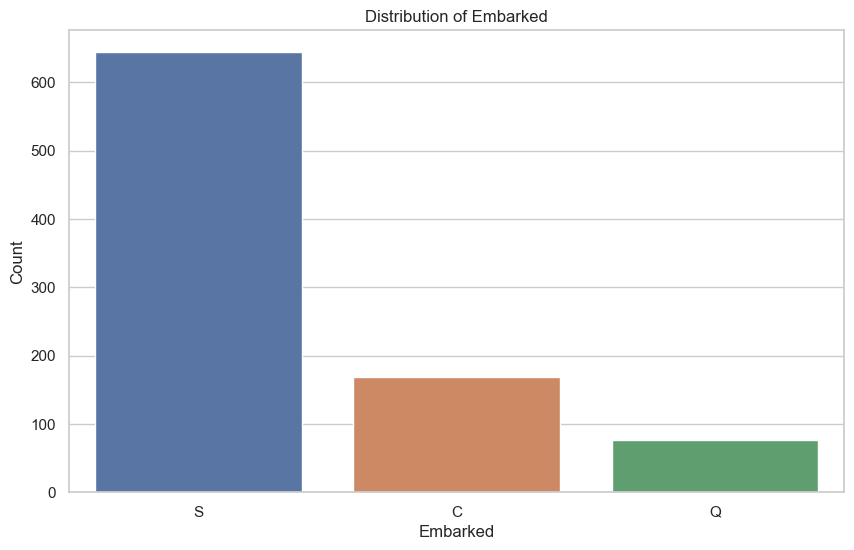

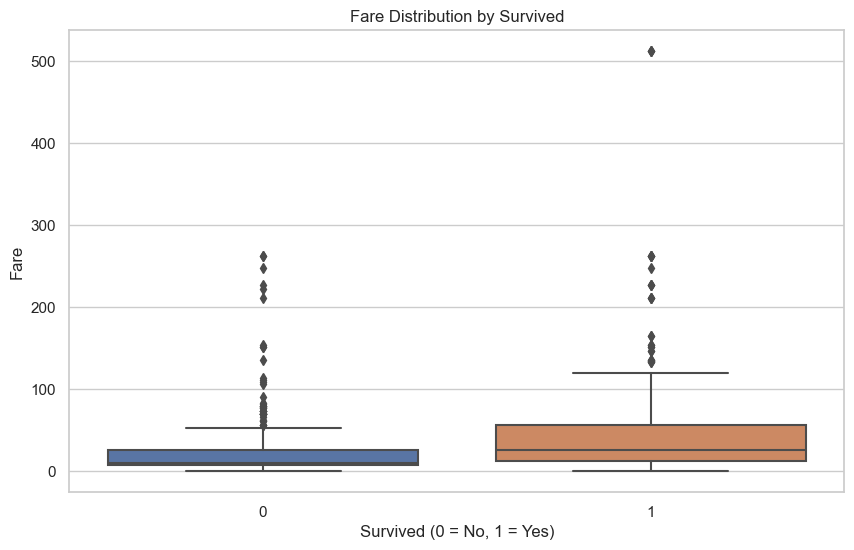

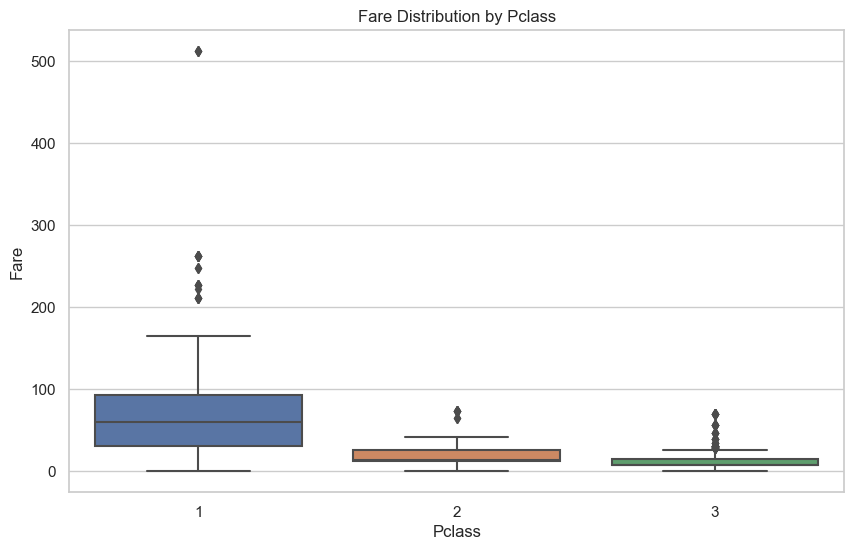

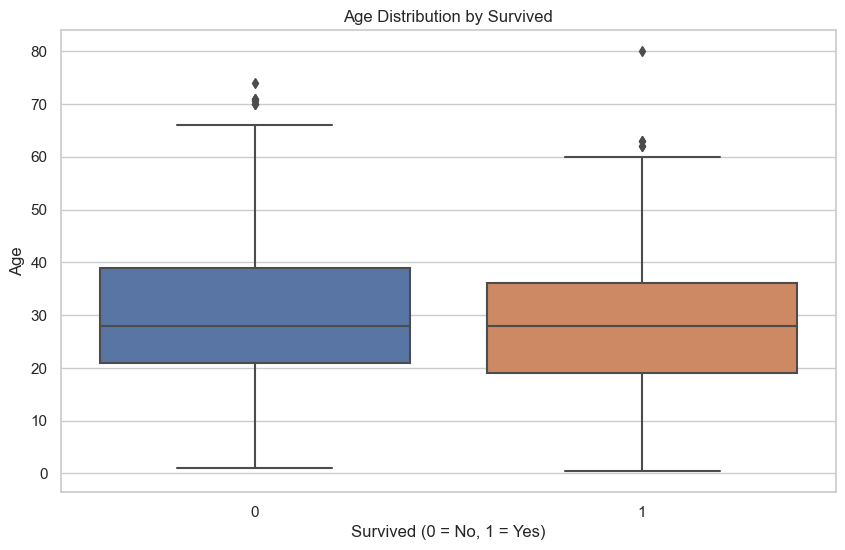

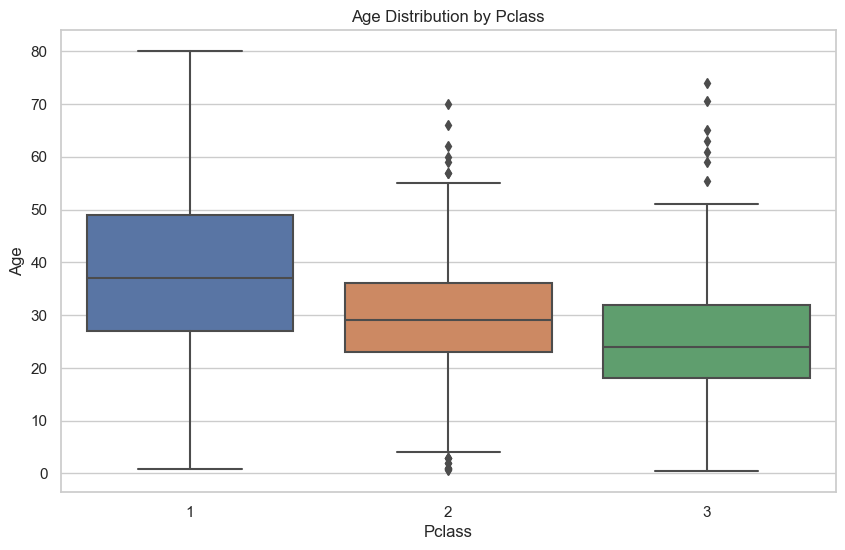

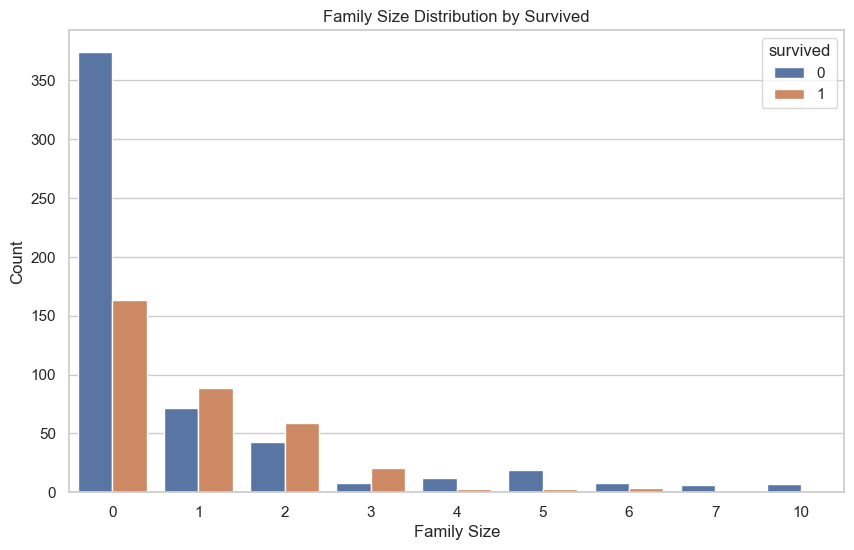

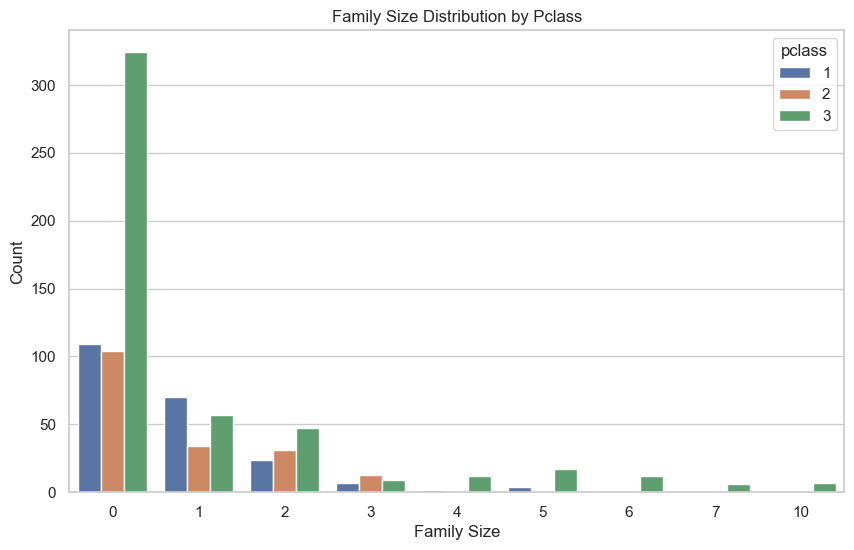

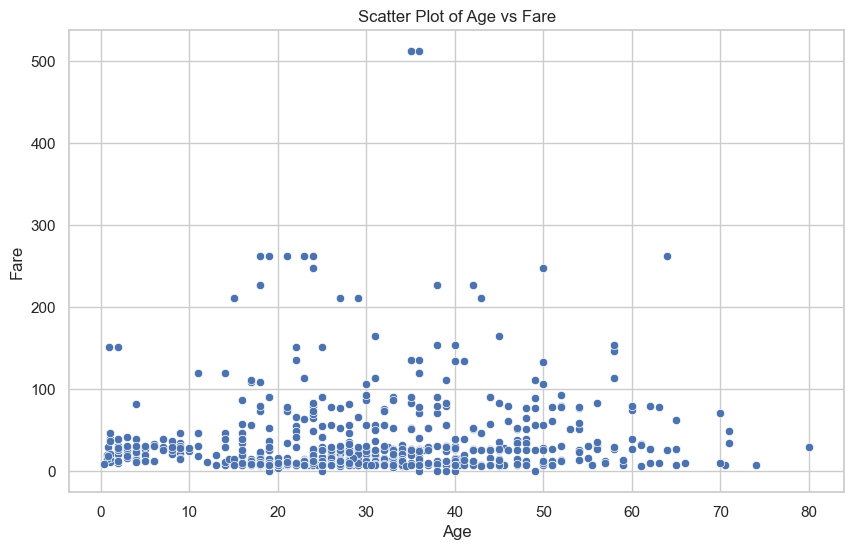

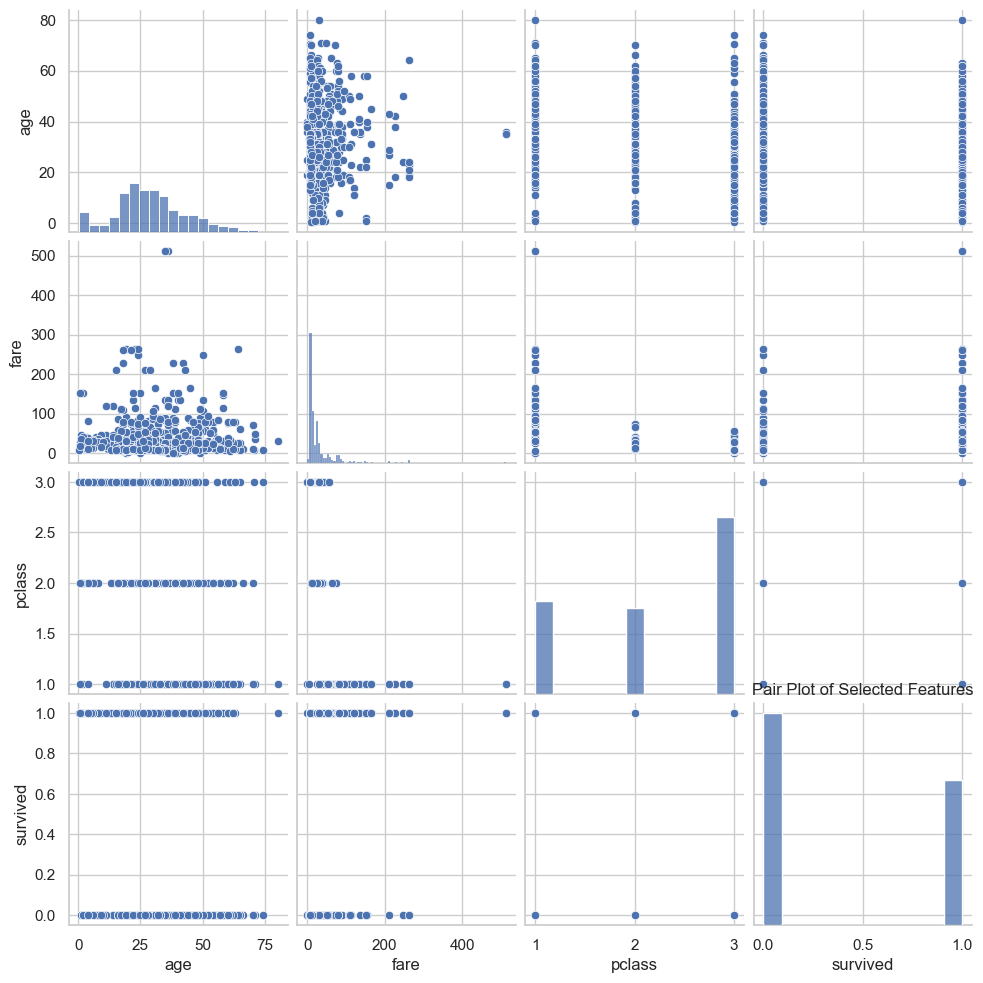

/var/folders/mq/b61pdn213xdfcpy6mh9bxww00000gn/T/ipykernel_50829/373615110.py:119: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


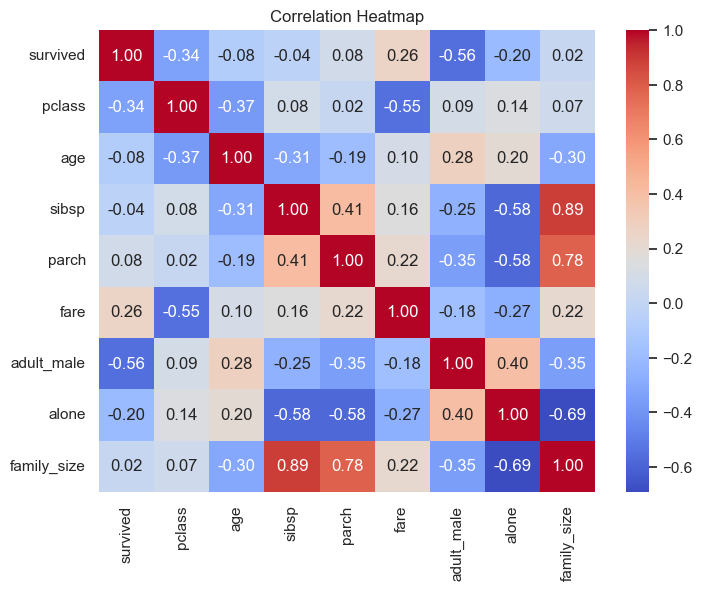

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# For demonstration, using the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', data=df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', data=df)
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='embarked', data=df)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['family_size'] = df['sibsp'] + df['parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 11. Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', data=df)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Other possibilities to show relationships
# You can explore pair plots or correlation heatmaps
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']].dropna())
plt.title('Pair Plot of Selected Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?


Correlation Matrix:
             survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.00000

/var/folders/mq/b61pdn213xdfcpy6mh9bxww00000gn/T/ipykernel_50829/3143831897.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


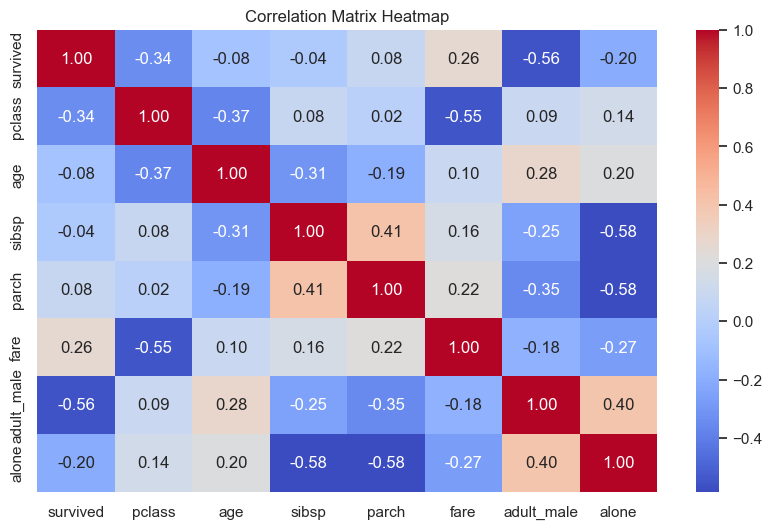


Correlation between Age and Fare: 0.10

Potential Correlations with 'Survived':
 fare          0.257307
parch         0.081629
sibsp        -0.035322
age          -0.077221
alone        -0.203367
pclass       -0.338481
adult_male   -0.557080
Name: survived, dtype: float64

Potential Correlations with 'Age':
 adult_male    0.280328
alone         0.198270
fare          0.096067
survived     -0.077221
parch        -0.189119
sibsp        -0.308247
pclass       -0.369226
Name: age, dtype: float64


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# For demonstration, using the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# 1. Generate a correlation matrix for the entire dataset
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 2. Find correlation between 'Age' and 'Fare'
age_fare_corr = df['age'].corr(df['fare'])
print(f"\nCorrelation between Age and Fare: {age_fare_corr:.2f}")

# 3. Other possible correlations
# Check correlations of numeric features
potential_correlations = correlation_matrix['survived'].drop('survived').sort_values(ascending=False)
print("\nPotential Correlations with 'Survived':\n", potential_correlations)

# You can also explore other pairwise correlations
# For example, Age with other features
age_correlations = correlation_matrix['age'].drop('age').sort_values(ascending=False)
print("\nPotential Correlations with 'Age':\n", age_correlations)
